# Generating Qubit Hamiltonians


In [1]:
from utility import *
from openfermion.utils import eigenspectrum


Specify the Qubit Hamiltonian of a molecule by its name, internuclear distances, basis set, and fermion-to-qubit transformation. Here, we show the resulting Hamiltonian for $H_2$ in STO-3G with $1\overset{\circ}{A}$ between the $H$ atoms.

In [2]:
qubit_transf = 'jw' # Jordan-Wigner transformations
h2 = get_qubit_hamiltonian(mol='h2', geometry=1, basis='sto3g', qubit_transf=qubit_transf)
print(h2)

-0.3276081896748089 [] +
-0.04919764587136759 [X0 X1 Y2 Y3] +
0.04919764587136759 [X0 Y1 Y2 X3] +
0.04919764587136759 [Y0 X1 X2 Y3] +
-0.04919764587136759 [Y0 Y1 X2 X3] +
0.13716572937099494 [Z0] +
0.15660062488237958 [Z0 Z1] +
0.10622904490856085 [Z0 Z2] +
0.15542669077992843 [Z0 Z3] +
0.13716572937099494 [Z1] +
0.15542669077992843 [Z1 Z2] +
0.10622904490856085 [Z1 Z3] +
-0.1303629205710914 [Z2] +
0.1632676867356435 [Z2 Z3] +
-0.13036292057109133 [Z3]




Alternatively, the qubit-tapering technique can find a smaller effective Hamitlonian by subsitituting operators with $\pm 1$. This technique is detailed in Bravyi's work ([Bravyi et al., "Tapering off qubits to simulate fermionic Hamiltonians", arXiv:1701.08213](https://arxiv.org/abs/1701.08213)).


In [3]:
print("The effective Hamiltonian:\n {}".format(taper_hamiltonian(h2, n_spin_orbitals=4, n_electrons=2, qubit_transf=qubit_transf)))

The effective Hamiltonian:
 -0.5310513494337643 [] +
0.19679058348547035 [X0] +
-0.5350572998841726 [Z0]




We can verify that this new Hamiltonian indeed includes the ground state.


In [4]:
print("The ground state energy:")
obtain_PES('h2', [1], 'sto-3g', 'fci')

# Building the matrix representation of the effective Hamiltonian
I, X, Z = np.identity(2), np.array([[0, 1], [1, 0]]), np.array([[1, 0], [0, -1]])
h2_matrix = -0.53105134 * I + 0.19679058 * X - 0.53505729 * Z

# Obtain the eigenvalues
eigvals, _ = np.linalg.eigh(h2_matrix)
print("\nThe eigenvalues in the effective Hamiltonian: \n {}".format(eigvals))

The ground state energy:
E = -1.1011503301329566 Eh

The eigenvalues in the effective Hamiltonian: 
 [-1.10115031  0.03904763]


# LiH

In [13]:
prec = 15
qubit_transf = 'jw' # Jordan-Wigner transformations
distance = np.linspace(0.2, 2.5, prec)
energy_fci = obtain_PES('lih', distance, 'sto-3g', 'fci')

energy_tap = np.zeros(prec)
for i in range(prec):
    lih = get_qubit_hamiltonian(mol='lih', geometry=distance[i], basis='sto3g', qubit_transf=qubit_transf)
    h = taper_hamiltonian(lih, n_spin_orbitals=12, n_electrons=4, qubit_transf=qubit_transf)
    energy_tap[i] = eigenspectrum(h)[0]

E = -4.041729928511248 Eh
E = -6.429861370018082 Eh
E = -7.13788957077205 Eh
E = -7.493904339466759 Eh
E = -7.689215310812076 Eh
E = -7.794713190864839 Eh
E = -7.8492902860353455 Eh
E = -7.874581847906651 Eh
E = -7.882569632578635 Eh
E = -7.880248081389585 Eh
E = -7.871967252286098 Eh
E = -7.86055461826769 Eh
E = -7.847906133388852 Eh
E = -7.835327375984795 Eh
E = -7.823723883389364 Eh


<IPython.core.display.Javascript object>


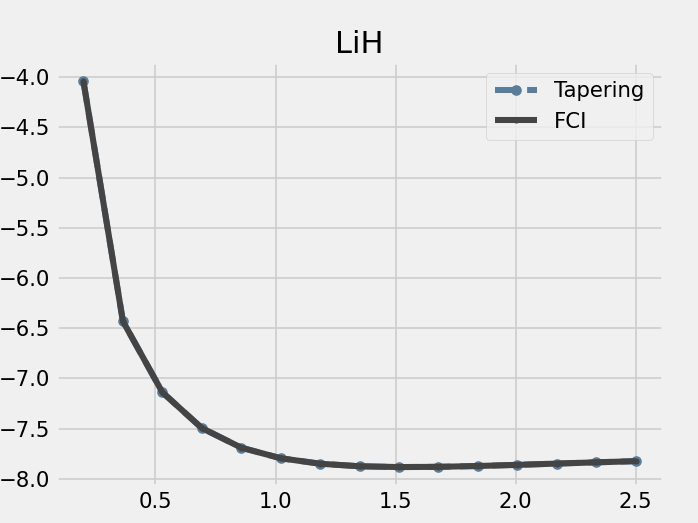

In [16]:
#%matplotlib notebook
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')


plt.plot(distance, energy_tap, color='#5a7d9a', linestyle='--', marker='o', label='Tapering')
plt.plot(distance, energy_fci, color='#444444', linestyle='-', marker='.', label='FCI')


plt.xlabel('r')
plt.ylabel('Energy')
plt.title('LiH')

plt.legend()
plt.grid(True)

# H$_4$

In [19]:
prec = 15
qubit_transf = 'jw' # Jordan-Wigner transformations
angles = np.linspace(85, 95, prec)
energy_fci = obtain_PES('h4', angles, 'sto-3g', 'fci')

energy_tap = np.zeros(prec)
for i in range(prec):
    h4 = get_qubit_hamiltonian(mol='h4', geometry=angles[i], basis='sto3g', qubit_transf=qubit_transf)
    h = taper_hamiltonian(h4, n_spin_orbitals=8, n_electrons=4, qubit_transf=qubit_transf)
    energy_tap[i] = eigenspectrum(h)[0]

E = -1.986726115111665 Eh
E = -1.9825409898098094 Eh
E = -1.9788022498350148 Eh
E = -1.9755879194306951 Eh
E = -1.9729780150314484 Eh
E = -1.9710482558385762 Eh
E = -1.9698619510159325 Eh
E = -1.9694615253790553 Eh
E = -1.9698619510159263 Eh
E = -1.9710482558385727 Eh
E = -1.9729780150314502 Eh
E = -1.9755879194306933 Eh
E = -1.978802249835021 Eh
E = -1.9825409898098094 Eh
E = -1.9867261151116788 Eh


<IPython.core.display.Javascript object>


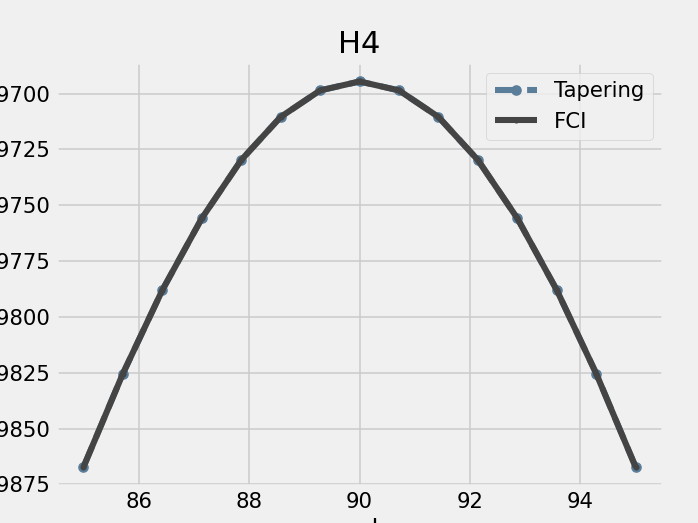

In [22]:
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')


plt.plot(angles, energy_tap, color='#5a7d9a', linestyle='--', marker='o', label='Tapering')
plt.plot(angles, energy_fci, color='#444444', linestyle='-', marker='.', label='FCI')


plt.xlabel('angle')
plt.ylabel('Energy')
plt.title('H4')

plt.legend()
plt.grid(True)